In [1]:
import pickle
import pandas as pd
import statsmodels.api as sm   # needs X intercept added for a valid R2
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
sns.set_style("darkgrid")
%pylab inline

/Users/sdutta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("../Data/project_data1.pkl", 'rb') as picklefile: 
    Movies = pickle.load(picklefile)

In [3]:
Movies

,MovieTitle,Franchise,Release_Date,budget,Domestic Gross,Adj_Dom_Gross,genre,Widest Release,Season,Month,rating,Run_Time,Director,FranchiseNum,WORLD_GROSS
0,300,300,2007-03-09,65000000.0,210614939,272146300,Period Action,3280.0,Winter,3,R,117.0,Zack Snyder,1,454161935
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,20000000.0,11798854,25093700,Family Adventure,2043.0,Spring,5,PG,94.0,All Time Domestic,2,11744960
2,A Haunted House,AHauntedHouse,2013-01-11,2500000.0,40041683,44832600,Comedy,2160.0,Winter,1,R,80.0,Michael Tiddes,1,59922558
3,A Haunted House 2,AHauntedHouse,2014-04-18,4000000.0,17329486,18494500,Horror Comedy,2310.0,Spring,4,R,87.0,Michael Tiddes,2,21206861
4,Kiss the Girls,AlexCross,1997-10-03,27000000.0,60527873,117231500,Thriller,2406.0,Fall,10,R,117.0,Morgan Freeman,1,60527873
5,Along Came a Spider,AlexCross,2001-04-06,60000000.0,74078174,116352500,Thriller,2573.0,Spring,4,R,103.0,Lee Tamahori,2,105159085
6,Alex Cross,AlexCross,2012-10-19,35000000.0,25888412,28590700,Crime Thriller,2541.0,Fall,10,PG-13,101.0,Rob Cohen,3,35426759
7,Alice Through the Looking Glass,AliceinWonderland,2016-05-27,170000000.0,77041381,78499700,Family Adventure,3763.0,Spring,5,PG,112.0,Writer:,2,277442381
8,Alien,Alien,1979-05-25,11000000.0,78944891,279609600,Sci-Fi Horror,757.0,Spring,5,R,117.0,Ridley Scott,1,203630630
9,Aliens,Alien,1986-07-18,17000000.0,85160248,204063200,Sci-Fi Horror,1454.0,Summer,7,R,137.0,James Cameron,2,183316455


## Adjusting Budget for inflation

In [4]:
Movies['Adj_Budget'] = Movies['budget']*Movies['Adj_Dom_Gross']/Movies['Domestic Gross']

In [5]:
Movies['Adj_World_Gross'] = Movies['WORLD_GROSS']*Movies['Adj_Dom_Gross']/Movies['Domestic Gross']

In [6]:
Movies.head()

,MovieTitle,Franchise,Release_Date,budget,Domestic Gross,Adj_Dom_Gross,genre,Widest Release,Season,Month,rating,Run_Time,Director,FranchiseNum,WORLD_GROSS,Adj_Budget,Adj_World_Gross
0,300,300,2007-03-09,65000000.0,210614939,272146300,Period Action,3280.0,Winter,3,R,117.0,Zack Snyder,1,454161935,8.398981e+07,5.868458e+08
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,20000000.0,11798854,25093700,Family Adventure,2043.0,Spring,5,PG,94.0,All Time Domestic,2,11744960,4.253583e+07,2.497908e+07
2,A Haunted House,AHauntedHouse,2013-01-11,2500000.0,40041683,44832600,Comedy,2160.0,Winter,1,R,80.0,Michael Tiddes,1,59922558,2.799121e+06,6.709219e+07
3,A Haunted House 2,AHauntedHouse,2014-04-18,4000000.0,17329486,18494500,Horror Comedy,2310.0,Spring,4,R,87.0,Michael Tiddes,2,21206861,4.268909e+06,2.263254e+07
4,Kiss the Girls,AlexCross,1997-10-03,27000000.0,60527873,117231500,Thriller,2406.0,Fall,10,R,117.0,Morgan Freeman,1,60527873,5.229410e+07,1.172315e+08


In [7]:
Movies.describe()

,budget,Domestic Gross,Adj_Dom_Gross,Widest Release,Month,Run_Time,FranchiseNum,WORLD_GROSS,Adj_Budget,Adj_World_Gross
count,5.930000e+02,5.930000e+02,5.930000e+02,593.000000,593.000000,593.000000,593.000000,5.930000e+02,5.930000e+02,5.930000e+02
mean,6.986330e+07,1.302218e+08,1.873410e+08,2943.782462,6.883642,110.202361,2.684654,3.162379e+08,9.332014e+07,4.368697e+08
std,6.538902e+07,1.142830e+08,1.597862e+08,1000.568626,3.070394,20.395901,1.863605,3.221080e+08,8.073125e+07,4.167060e+08
min,7.000000e+03,7.396000e+03,8.300000e+03,1.000000,1.000000,63.000000,1.000000,7.396000e+03,1.503121e+04,8.300000e+03
25%,1.900000e+07,4.807130e+07,6.544570e+07,2396.000000,5.000000,94.000000,1.000000,8.527871e+07,3.030891e+07,1.179016e+08
50%,4.200000e+07,9.104708e+07,1.493454e+08,3181.000000,7.000000,106.000000,2.000000,2.028124e+08,6.709433e+07,3.105092e+08
75%,1.100000e+08,1.810306e+08,2.609284e+08,3692.000000,10.000000,123.000000,3.000000,4.350404e+08,1.428342e+08,6.352604e+08
max,2.700000e+08,9.366622e+08,1.138621e+09,4468.000000,12.000000,200.000000,10.000000,2.783919e+09,6.786261e+08,3.166146e+09


In [8]:
Movies.shape

(593, 17)

In [9]:
Movies.corr()

,budget,Domestic Gross,Adj_Dom_Gross,Widest Release,Month,Run_Time,FranchiseNum,WORLD_GROSS,Adj_Budget,Adj_World_Gross
budget,1.000000,0.680585,0.455737,0.684869,0.031388,0.556338,0.326144,0.754105,0.908708,0.602266
Domestic Gross,0.680585,1.000000,0.860749,0.567906,0.067851,0.489890,0.158944,0.913058,0.617717,0.841979
Adj_Dom_Gross,0.455737,0.860749,1.000000,0.297509,0.077969,0.475164,0.016711,0.733240,0.517118,0.879480
Widest Release,0.684869,0.567906,0.297509,1.000000,-0.007558,0.260157,0.278460,0.594882,0.551850,0.417215
Month,0.031388,0.067851,0.077969,-0.007558,1.000000,0.106707,0.082730,0.055573,0.052473,0.067967
Run_Time,0.556338,0.489890,0.475164,0.260157,0.106707,1.000000,0.172245,0.509185,0.576358,0.525915
FranchiseNum,0.326144,0.158944,0.016711,0.278460,0.082730,0.172245,1.000000,0.225020,0.233719,0.104562
WORLD_GROSS,0.754105,0.913058,0.733240,0.594882,0.055573,0.509185,0.225020,1.000000,0.669971,0.894482
Adj_Budget,0.908708,0.617717,0.517118,0.551850,0.052473,0.576358,0.233719,0.669971,1.000000,0.667993
Adj_World_Gross,0.602266,0.841979,0.879480,0.417215,0.067967,0.525915,0.104562,0.894482,0.667993,1.000000


In [10]:
Movies.head()

,MovieTitle,Franchise,Release_Date,budget,Domestic Gross,Adj_Dom_Gross,genre,Widest Release,Season,Month,rating,Run_Time,Director,FranchiseNum,WORLD_GROSS,Adj_Budget,Adj_World_Gross
0,300,300,2007-03-09,65000000.0,210614939,272146300,Period Action,3280.0,Winter,3,R,117.0,Zack Snyder,1,454161935,8.398981e+07,5.868458e+08
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,20000000.0,11798854,25093700,Family Adventure,2043.0,Spring,5,PG,94.0,All Time Domestic,2,11744960,4.253583e+07,2.497908e+07
2,A Haunted House,AHauntedHouse,2013-01-11,2500000.0,40041683,44832600,Comedy,2160.0,Winter,1,R,80.0,Michael Tiddes,1,59922558,2.799121e+06,6.709219e+07
3,A Haunted House 2,AHauntedHouse,2014-04-18,4000000.0,17329486,18494500,Horror Comedy,2310.0,Spring,4,R,87.0,Michael Tiddes,2,21206861,4.268909e+06,2.263254e+07
4,Kiss the Girls,AlexCross,1997-10-03,27000000.0,60527873,117231500,Thriller,2406.0,Fall,10,R,117.0,Morgan Freeman,1,60527873,5.229410e+07,1.172315e+08


In [11]:
Movies2_df = Movies.filter(['MovieTitle','Franchise','Release_Date','Adj_Budget','Adj_Dom_Gross','Adj_World_Gross',\
                            'genre','Widest Release','Season','Month','rating','Run_Time','FranchiseNum'])
Movies2_df.rename(columns={'Widest Release': 'Widest_Release'}, inplace = True)

In [12]:
Movies2_df.shape

(593, 13)

In [13]:
Movies2_df.describe()

,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,Widest_Release,Month,Run_Time,FranchiseNum
count,5.930000e+02,5.930000e+02,5.930000e+02,593.000000,593.000000,593.000000,593.000000
mean,9.332014e+07,1.873410e+08,4.368697e+08,2943.782462,6.883642,110.202361,2.684654
std,8.073125e+07,1.597862e+08,4.167060e+08,1000.568626,3.070394,20.395901,1.863605
min,1.503121e+04,8.300000e+03,8.300000e+03,1.000000,1.000000,63.000000,1.000000
25%,3.030891e+07,6.544570e+07,1.179016e+08,2396.000000,5.000000,94.000000,1.000000
50%,6.709433e+07,1.493454e+08,3.105092e+08,3181.000000,7.000000,106.000000,2.000000
75%,1.428342e+08,2.609284e+08,6.352604e+08,3692.000000,10.000000,123.000000,3.000000
max,6.786261e+08,1.138621e+09,3.166146e+09,4468.000000,12.000000,200.000000,10.000000


In [14]:
Movies2_df.head()

,MovieTitle,Franchise,Release_Date,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,genre,Widest_Release,Season,Month,rating,Run_Time,FranchiseNum
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,R,117.0,1
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,4.253583e+07,25093700,2.497908e+07,Family Adventure,2043.0,Spring,5,PG,94.0,2
2,A Haunted House,AHauntedHouse,2013-01-11,2.799121e+06,44832600,6.709219e+07,Comedy,2160.0,Winter,1,R,80.0,1
3,A Haunted House 2,AHauntedHouse,2014-04-18,4.268909e+06,18494500,2.263254e+07,Horror Comedy,2310.0,Spring,4,R,87.0,2
4,Kiss the Girls,AlexCross,1997-10-03,5.229410e+07,117231500,1.172315e+08,Thriller,2406.0,Fall,10,R,117.0,1


In [15]:
Movies2_df.corr()

,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,Widest_Release,Month,Run_Time,FranchiseNum
Adj_Budget,1.000000,0.517118,0.667993,0.551850,0.052473,0.576358,0.233719
Adj_Dom_Gross,0.517118,1.000000,0.879480,0.297509,0.077969,0.475164,0.016711
Adj_World_Gross,0.667993,0.879480,1.000000,0.417215,0.067967,0.525915,0.104562
Widest_Release,0.551850,0.297509,0.417215,1.000000,-0.007558,0.260157,0.278460
Month,0.052473,0.077969,0.067967,-0.007558,1.000000,0.106707,0.082730
Run_Time,0.576358,0.475164,0.525915,0.260157,0.106707,1.000000,0.172245
FranchiseNum,0.233719,0.016711,0.104562,0.278460,0.082730,0.172245,1.000000


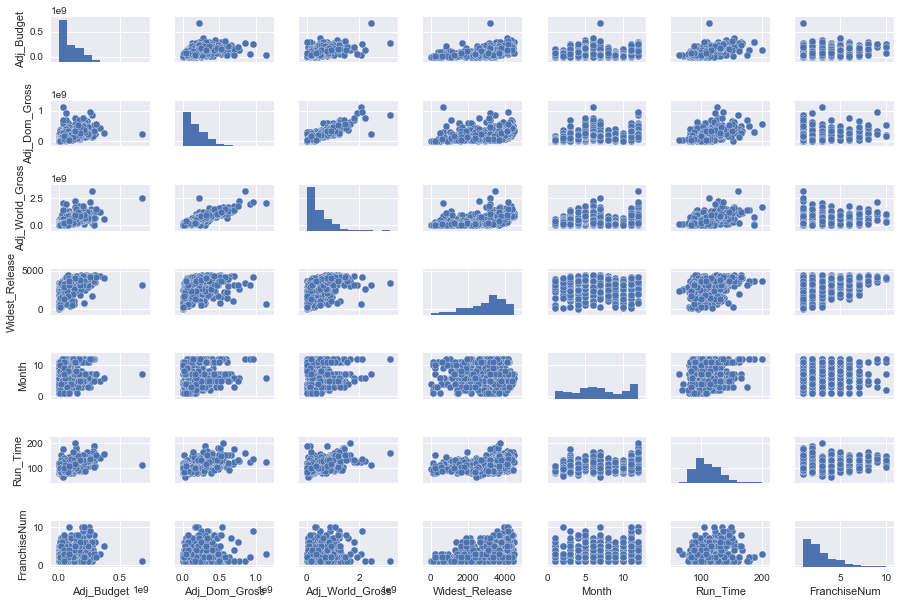

In [16]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(Movies2_df, size = 1.2, aspect=1.5)

# Diagonal row should roughly have a normal distribution

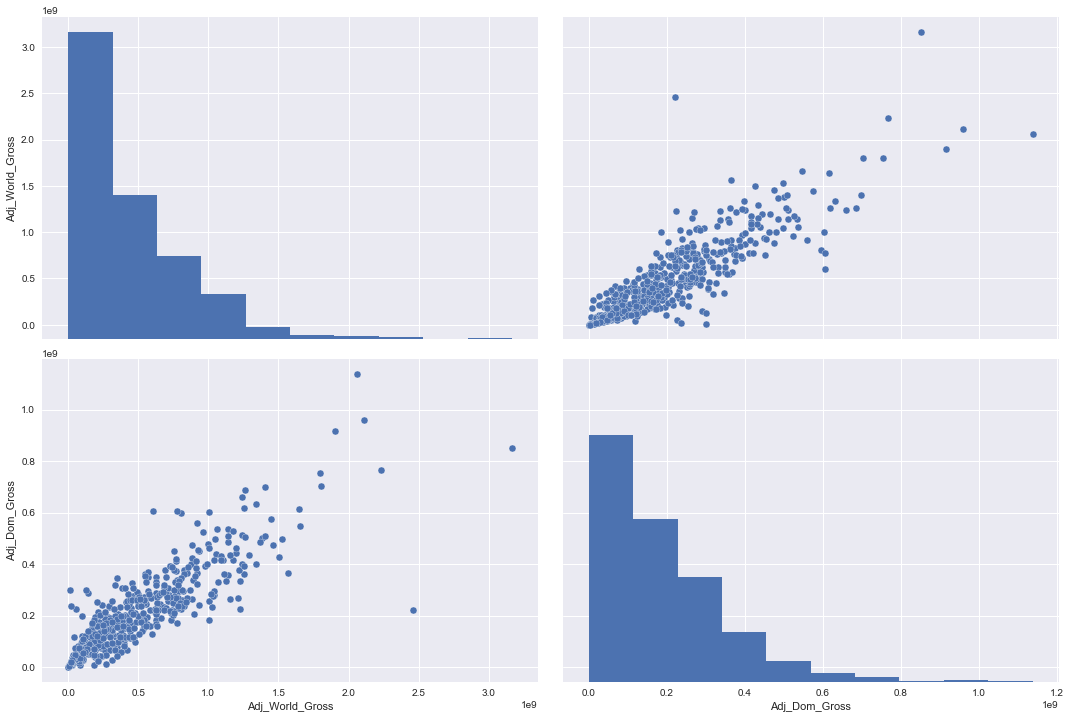

In [17]:
sns.pairplot(Movies2_df[['Adj_World_Gross','Adj_Dom_Gross']], size = 5, aspect=1.5)


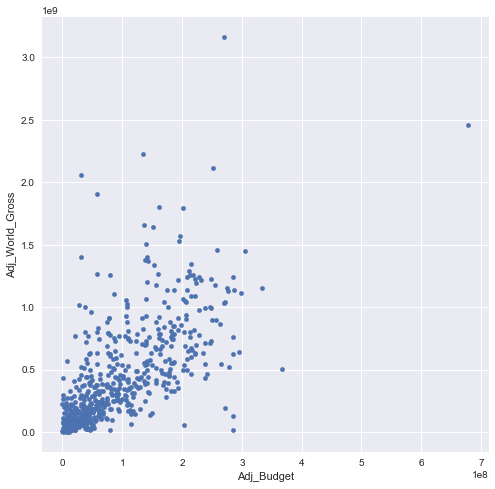

In [18]:
Movies2_df.plot(x='Adj_Budget',y="Adj_World_Gross",kind='scatter',figsize=(8,8))

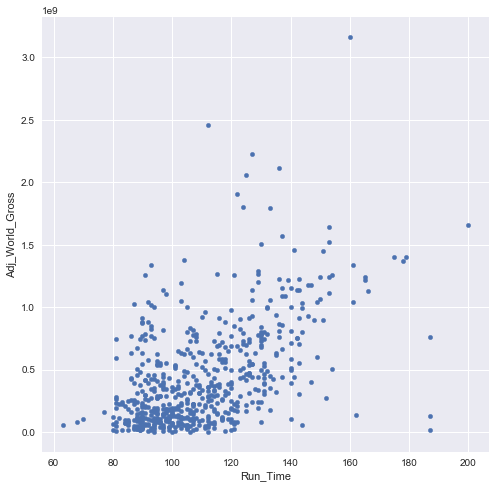

In [19]:
Movies2_df.plot(x='Run_Time',y="Adj_World_Gross",kind='scatter',figsize=(8,8))

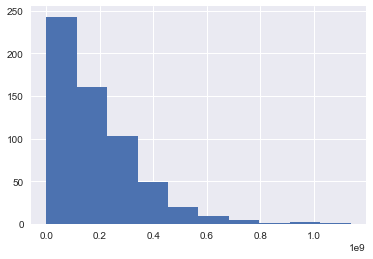

In [20]:
# so values concnetrated in 0 to 1e8 need and check if the values are too small or zeros
# If so it indicates problem with the data --- we find below that is not the case
# its just a few very high values are making it right skewed
Movies2_df.Adj_Dom_Gross.hist()



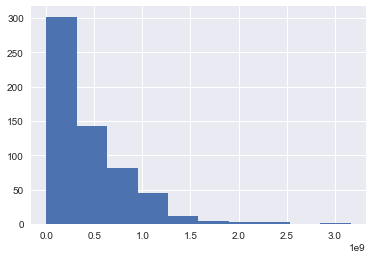

In [21]:
Movies2_df.Adj_World_Gross.hist()

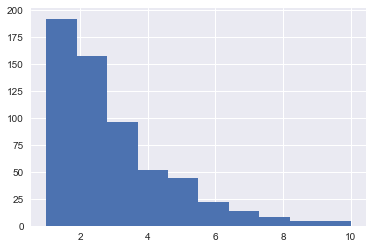

In [22]:
Movies2_df.FranchiseNum.hist()

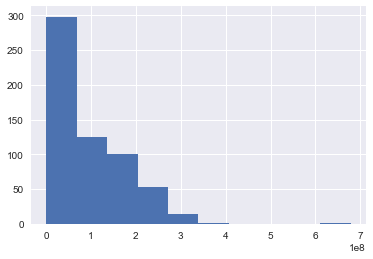

In [23]:
Movies2_df.Adj_Budget.hist()

In [24]:
Movies2_df.Franchise.nunique()

205

In [25]:
Movies2_df[(Movies2_df['Adj_Dom_Gross']<5000000)]

,MovieTitle,Franchise,Release_Date,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,genre,Widest_Release,Season,Month,rating,Run_Time,FranchiseNum
25,Atlas Shrugged: Part II,AtlasShruggedFranchise,2012-10-12,1.104359e+07,3684200,3.684200e+06,Drama,1012.0,Fall,10,PG-13,112.0,2
109,El Mariachi,ElMariachi,1993-02-26,1.503121e+04,4382500,4.384664e+06,Action,88.0,Winter,2,R,81.0,1
252,The Giant Mechanical Man,Mechanic,2012-04-27,1.010005e+06,8300,8.300000e+03,Romantic Comedy,1.0,Spring,4,PG-13,94.0,1
473,The Work and the Glory,TheWorkandtheGlory,2004-11-24,1.050962e+07,4691000,4.691000e+06,Period Drama,112.0,Fall,11,PG,118.0,1
498,Mallrats,ViewAskewniverse,1995-10-20,1.246635e+07,4337800,4.308792e+06,Comedy,852.0,Fall,10,R,97.0,2
5,Atlas Shrugged Part III: Who Is John Galt?,AtlasShruggedFranchise,2014-09-12,5.493065e+06,930200,9.356777e+05,Drama,242.0,Fall,9,PG-13,106.0,3
64,The Work and the Glory II: American Zion,TheWorkandtheGlory,2005-10-21,9.003561e+06,2805000,2.805000e+06,Period Drama,206.0,Fall,10,PG-13,100.0,2


In [26]:
log_Adj_Dom_Gross = log(Movies2_df['Adj_Dom_Gross'])

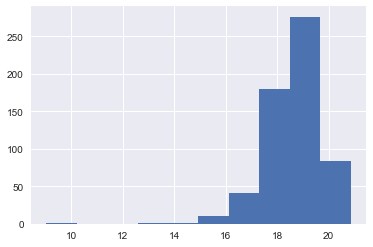

In [27]:
# transform feature to lognormal 

log_Adj_Dom_Gross.hist()

## sm.OLS below doesn't provide an intercept so it can't be used 

In [28]:
# Use Patsy to convert variables into matrix form
# Give Patsy our dataframe and our formula, and it gives our variables in correct form organized in the way we need them (ind and dep)
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Adj_World_Gross ~ Adj_Budget + Run_Time', data=Movies2_df, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit1 = model.fit()
# Print summary
fit1.summary()  #+ Widest_Release+ FranchiseNum 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Adj_World_Gross   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     267.9
Date:                Tue, 10 Oct 2017   Prob (F-statistic):           1.64e-83
Time:                        12:03:37   Log-Likelihood:                -12419.
No. Observations:                 593   AIC:                         2.484e+04
Df Residuals:                     590   BIC:                         2.486e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.014e+08   7.44e+07     -4.049      0.000   -4.48e+08   -1.55e+08
Adj_Budget     2.8202      0.188     14.982      0.000       2.450       3.190
Run_Time    4.311e+06   7.45e+05      5.786      0.000    2.85e+06    5.77e+06
==============================================================================
Omnibus:                      255.912   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2142.261
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                      11.672   Cond. No.                     7.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Change all models to this form as the earlier model doesn't have intercept

In [29]:
    lsm = smf.ols('log(Adj_World_Gross) ~ log(Adj_Budget) + Run_Time', data=Movies2_df)

    fit = lsm.fit()

    fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log(Adj_World_Gross)   R-squared:                       0.456
Model:                              OLS   Adj. R-squared:                  0.454
Method:                   Least Squares   F-statistic:                     247.6
Date:                  Tue, 10 Oct 2017   Prob (F-statistic):           8.58e-79
Time:                          12:03:37   Log-Likelihood:                -798.89
No. Observations:                   593   AIC:                             1604.
Df Residuals:                       590   BIC:                             1617.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.1755      0.527     15.499      0.000       7.139       9.211
log(Adj_Budget)     0.5663      0.033     16.909      0.000       0.501       0.632
Run_Time            0.0098      0.002      4.575      0.000       0.006       0.014
==============================================================================
Omnibus:                      246.929   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3721.008
Skew:                          -1.423   Prob(JB):                         0.00
Kurtosis:                      14.937   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

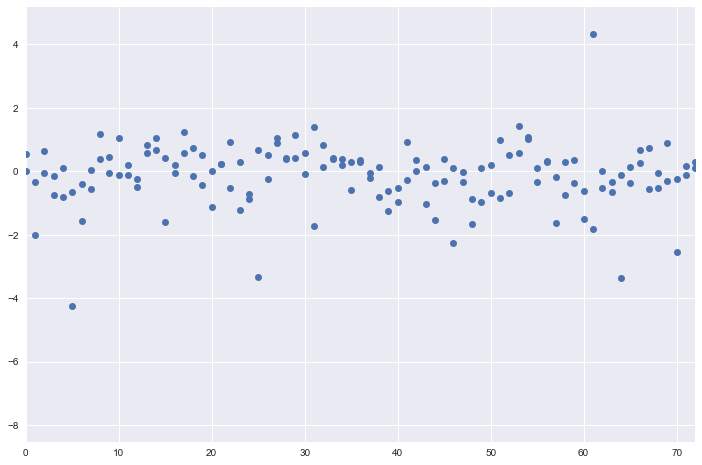

In [30]:
# Use statsmodels to plot the residuals
# This plot should NOT have trends in it
fit.resid.plot(style='o', figsize=(12,8))

  ### Adding  log(FranchiseNumXWidest_Release)  and log(FranchiseNum) to the model

In [31]:
    lsm = smf.ols('log(Adj_World_Gross) ~  Run_Time + log(Adj_Budget) + \
                 log(FranchiseNum)+ log(FranchiseNum * Widest_Release)', data=Movies2_df)

    fit = lsm.fit()

    fit.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log(Adj_World_Gross)   R-squared:                       0.573
Model:                              OLS   Adj. R-squared:                  0.570
Method:                   Least Squares   F-statistic:                     197.5
Date:                  Tue, 10 Oct 2017   Prob (F-statistic):          3.08e-107
Time:                          12:03:37   Log-Likelihood:                -727.04
No. Observations:                   593   AIC:                             1464.
Df Residuals:                       588   BIC:                             1486.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              5.3906      0.517     10.426      0.000       4.375       6.406
Run_Time                               0.0126      0.002      6.586      0.000       0.009       0.016
log(Adj_Budget)                        0.3798      0.035     10.862      0.000       0.311       0.449
log(FranchiseNum)                     -1.1001      0.091    -12.152      0.000      -1.278      -0.922
log(FranchiseNum * Widest_Release)     0.7689      0.064     11.960      0.000       0.643       0.895
==============================================================================
Omnibus:                       71.769   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.757
Skew:                          -0.461   Prob(JB):                     8.10e-66
Kurtosis:                       6.359   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
Movies2_df.columns

Index(['MovieTitle', 'Franchise', 'Release_Date', 'Adj_Budget',
       'Adj_Dom_Gross', 'Adj_World_Gross', 'genre', 'Widest_Release', 'Season',
       'Month', 'rating', 'Run_Time', 'FranchiseNum'],
      dtype='object')

##  Creating Dummy Variables / Indicator Variables

### Adding Season

In [33]:
# Let's add ''
print(Movies2_df.Season.value_counts())
print('\n')
print(len(Movies2_df.Season.value_counts()))

Summer    197
Fall      146
Winter    136
Spring    114
Name: Season, dtype: int64


4


In [34]:
Movies2_df.columns

Index(['MovieTitle', 'Franchise', 'Release_Date', 'Adj_Budget',
       'Adj_Dom_Gross', 'Adj_World_Gross', 'genre', 'Widest_Release', 'Season',
       'Month', 'rating', 'Run_Time', 'FranchiseNum'],
      dtype='object')

In [35]:
Movies3_df = Movies2_df.filter(['MovieTitle', 'Franchise', 'Release_Date', 'Adj_Budget',
       'Adj_Dom_Gross', 'Adj_World_Gross', 'genre', 'Widest_Release', 'Season',
       'Month', 'rating', 'Run_Time', 'FranchiseNum'])

In [36]:
# Let's use patsy to convert the feature 'make' to categorical variables
X=patsy.dmatrix('Season',data=Movies3_df,return_type='dataframe')
X.head()
# Patsy will drop one to use as an indicator (the first one alphabeticaly - AlphaRomero)
# can make categoricals by hand instead using:
# cars.make == "audi"

# Q for Students: What do you notice about the returned matrix ? 
# look at Audi (2nd column)

,Intercept,Season[T.Spring],Season[T.Summer],Season[T.Winter]
0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [37]:
Movies3_df.columns
Movies3_df = Movies3_df.join(X)

In [38]:
Movies3_df['Fall'] = np.where(Movies3_df['Season'] == 'Fall', 1.0, 0.0)

In [39]:
Movies3_df.head()

,MovieTitle,Franchise,Release_Date,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,genre,Widest_Release,Season,Month,rating,Run_Time,FranchiseNum,Intercept,Season[T.Spring],Season[T.Summer],Season[T.Winter],Fall
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,R,117.0,1,1.0,0.0,0.0,1.0,0.0
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,R,117.0,1,1.0,0.0,0.0,1.0,0.0
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,R,102.0,2,1.0,0.0,0.0,1.0,0.0
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,R,102.0,2,1.0,0.0,0.0,1.0,0.0
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,4.253583e+07,25093700,2.497908e+07,Family Adventure,2043.0,Spring,5,PG,94.0,2,1.0,1.0,0.0,0.0,0.0


In [40]:
lm = smf.ols('log(Adj_World_Gross) ~ Run_Time + log(Adj_Budget) \
            + C(Season) + Fall + log(FranchiseNum)+Widest_Release', data=Movies3_df)
fit11 = lm.fit()   
fit11.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log(Adj_World_Gross)   R-squared:                       0.558
Model:                              OLS   Adj. R-squared:                  0.553
Method:                   Least Squares   F-statistic:                     131.6
Date:                  Tue, 10 Oct 2017   Prob (F-statistic):          6.17e-125
Time:                          12:03:41   Log-Likelihood:                -935.15
No. Observations:                   739   AIC:                             1886.
Df Residuals:                       731   BIC:                             1923.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.9924      0.399     20.055      0.000       7.210       8.775
C(Season)[T.Spring]     2.0698      0.121     17.057      0.000       1.832       2.308
C(Season)[T.Summer]     2.0805      0.117     17.708      0.000       1.850       2.311
C(Season)[T.Winter]     1.9552      0.113     17.232      0.000       1.732       2.178
Run_Time                0.0116      0.002      6.427      0.000       0.008       0.015
log(Adj_Budget)         0.3932      0.034     11.492      0.000       0.326       0.460
Fall                    1.8869      0.105     17.949      0.000       1.681       2.093
log(FranchiseNum)      -0.3414      0.052     -6.618      0.000      -0.443      -0.240
Widest_Release          0.0004      4e-05     11.245      0.000       0.000       0.001
==============================================================================
Omnibus:                      266.908   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3467.036
Skew:                          -1.245   Prob(JB):                         0.00
Kurtosis:                      13.315   Cond. No.                     3.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
Movies3_df['log_Adj_World_Gross'] = np.log(Movies3_df['Adj_World_Gross'])
Movies3_df['log_Adj_Budget'] = np.log(Movies3_df['Adj_Budget'])
Movies3_df['log_FranchiseNum'] = np.log(Movies3_df['FranchiseNum'])
Movies3_df

,MovieTitle,Franchise,Release_Date,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,genre,Widest_Release,Season,Month,...,Run_Time,FranchiseNum,Intercept,Season[T.Spring],Season[T.Summer],Season[T.Winter],Fall,log_Adj_World_Gross,log_Adj_Budget,log_FranchiseNum
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,...,117.0,1,1.0,0.0,0.0,1.0,0.0,20.190273,18.246206,0.000000
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,...,117.0,1,1.0,0.0,0.0,1.0,0.0,20.190273,18.246206,0.000000
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,...,102.0,2,1.0,0.0,0.0,1.0,0.0,19.723398,18.622424,0.693147
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,...,102.0,2,1.0,0.0,0.0,1.0,0.0,19.723398,18.622424,0.693147
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,4.253583e+07,25093700,2.497908e+07,Family Adventure,2043.0,Spring,5,...,94.0,2,1.0,1.0,0.0,0.0,0.0,17.033549,17.565857,0.693147
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,4.253583e+07,25093700,2.497908e+07,Family Adventure,2043.0,Spring,5,...,94.0,2,1.0,0.0,0.0,0.0,0.0,17.033549,17.565857,0.693147
1,Alien Resurrection,Alien,1997-11-26,1.452614e+08,92571500,3.112467e+08,Sci-Fi Horror,2449.0,Fall,11,...,109.0,4,1.0,1.0,0.0,0.0,1.0,19.556096,18.794045,1.386294
1,Alien Resurrection,Alien,1997-11-26,1.452614e+08,92571500,3.112467e+08,Sci-Fi Horror,2449.0,Fall,11,...,109.0,4,1.0,0.0,0.0,0.0,1.0,19.556096,18.794045,1.386294
2,A Haunted House,AHauntedHouse,2013-01-11,2.799121e+06,44832600,6.709219e+07,Comedy,2160.0,Winter,1,...,80.0,1,1.0,0.0,0.0,1.0,0.0,18.021578,14.844816,0.000000
2,A Haunted House,AHauntedHouse,2013-01-11,2.799121e+06,44832600,6.709219e+07,Comedy,2160.0,Winter,1,...,80.0,1,1.0,0.0,1.0,0.0,0.0,18.021578,14.844816,0.000000


In [42]:
Movies3_df['Spring'] = Movies3_df['Season[T.Spring]'] 
Movies3_df['Summer'] = Movies3_df['Season[T.Summer]'] 
Movies3_df['Winter'] = Movies3_df['Season[T.Winter]'] 
del Movies3_df['Season[T.Spring]']
del Movies3_df['Season[T.Summer]']
del Movies3_df['Season[T.Winter]']
Movies3_df.head()


,MovieTitle,Franchise,Release_Date,Adj_Budget,Adj_Dom_Gross,Adj_World_Gross,genre,Widest_Release,Season,Month,...,Run_Time,FranchiseNum,Intercept,Fall,log_Adj_World_Gross,log_Adj_Budget,log_FranchiseNum,Spring,Summer,Winter
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,...,117.0,1,1.0,0.0,20.190273,18.246206,0.000000,0.0,0.0,1.0
0,300,300,2007-03-09,8.398981e+07,272146300,5.868458e+08,Period Action,3280.0,Winter,3,...,117.0,1,1.0,0.0,20.190273,18.246206,0.000000,0.0,0.0,1.0
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,...,102.0,2,1.0,0.0,19.723398,18.622424,0.693147,0.0,0.0,1.0
0,300: Rise of An Empire,300,2014-03-07,1.223534e+08,118549400,3.679279e+08,Period Action,3490.0,Winter,3,...,102.0,2,1.0,0.0,19.723398,18.622424,0.693147,0.0,0.0,1.0
1,3 Ninjas Kick Back,3Ninjas,1994-05-06,4.253583e+07,25093700,2.497908e+07,Family Adventure,2043.0,Spring,5,...,94.0,2,1.0,0.0,17.033549,17.565857,0.693147,1.0,0.0,0.0


In [43]:
Movies2_df.to_pickle('../Data/Movies2DF.pkl')

In [44]:
!ls ../Data

Analysis1_DF.pkl      GenreDF_y.pkl         lcvGenre_sk_model.pkl
FinalBudget.json      Genre_DF.pkl          lcvMain_sk_model.pkl
Finalnew_movies.json  Movies2DF.pkl         missbudget.json
GenreDF.pkl           New2_DF.pkl           project_data1.pkl
GenreDF_OLS_fit2.pkl  OLS_Main_sk_model.pkl project_data2.pkl
GenreDF_X.pkl         flist.json            rcvMain_sk_model.pkl




## Cross Validation

### sklearn's train_test_split function 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### CV of the model for which I recieved the highest adj R2  through feature selection and transformation

In [46]:
Movies2_df.columns


Index(['MovieTitle', 'Franchise', 'Release_Date', 'Adj_Budget',
       'Adj_Dom_Gross', 'Adj_World_Gross', 'genre', 'Widest_Release', 'Season',
       'Month', 'rating', 'Run_Time', 'FranchiseNum'],
      dtype='object')

In [47]:
New2 = Movies2_df.filter(['MovieTitle','Franchise','genre','Release_Date','FranchiseNum',\
                          'Adj_World_Gross','Adj_Budget','Widest_Release','Run_Time'])  


In [48]:
New2.head()

,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time
0,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0
1,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0
2,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0
3,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0
4,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0


In [49]:
New2['log_Adj_World_Gross'] = np.log(New2['Adj_World_Gross'])
New2['log_Adj_Budget'] = np.log(New2['Adj_Budget'])
New2['log_FranchiseNum'] = np.log(New2['FranchiseNum'])
New2['log_FranNum_X_WidRel'] = np.log(New2['FranchiseNum']*New2['Widest_Release'])
New2.head()

,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_World_Gross,log_Adj_Budget,log_FranchiseNum,log_FranNum_X_WidRel
0,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,20.190273,18.246206,0.000000,8.095599
1,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.033549,17.565857,0.693147,8.315322
2,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,18.021578,14.844816,0.000000,7.677864
3,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,16.934899,15.266869,0.693147,8.438150
4,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,18.579661,17.772394,0.000000,7.785721


In [50]:
col = list(New2)
col.insert(0,col.pop(col.index('log_Adj_World_Gross')))
New2 = New2.loc[:, col]

In [51]:
New2.head()

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranchiseNum,log_FranNum_X_WidRel
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,0.000000,8.095599
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,0.693147,8.315322
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,0.000000,7.677864
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,0.693147,8.438150
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,0.000000,7.785721


### Highest adjusted Rsquared acheived via feature selection

#### Model 1




In [52]:
lm = smf.ols('log_Adj_World_Gross ~log_Adj_Budget + Run_Time + log_FranchiseNum\
+ log_FranNum_X_WidRel +Widest_Release ', data=New2)
fit14 = lm.fit()
fit14.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_Adj_World_Gross   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.570
Method:                  Least Squares   F-statistic:                     157.8
Date:                 Tue, 10 Oct 2017   Prob (F-statistic):          4.07e-106
Time:                         12:03:58   Log-Likelihood:                -726.92
No. Observations:                  593   AIC:                             1466.
Df Residuals:                      587   BIC:                             1492.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.6747      0.766      7.410      0.000       4.171       7.179
log_Adj_Budget           0.3763      0.036     10.538      0.000       0.306       0.446
Run_Time                 0.0125      0.002      6.515      0.000       0.009       0.016
log_FranchiseNum        -1.0647      0.115     -9.281      0.000      -1.290      -0.839
log_FranNum_X_WidRel     0.7299      0.101      7.242      0.000       0.532       0.928
Widest_Release        3.357e-05   6.67e-05      0.503      0.615   -9.75e-05       0.000
==============================================================================
Omnibus:                       73.303   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.292
Skew:                          -0.470   Prob(JB):                     4.18e-68
Kurtosis:                       6.417   Cond. No.                     7.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Widest_Release is not significant
- Significant features: log_Adj_Budget, Run_Time, log_FranchiseNum, log_FranNum_X_WidRel

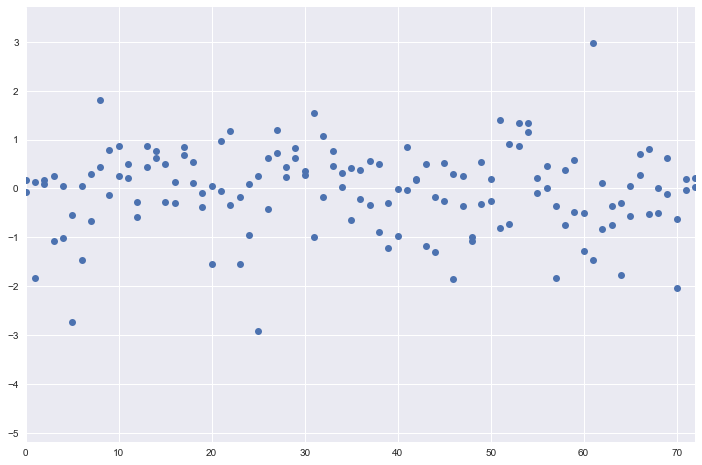

In [53]:
fit14.resid.plot(style='o', figsize=(12,8))

## Cross Validation

Cross Validated adjusted r2 should not differ from model's r2 by over 10%  
If it differs by more than 10%, the model needs to be regularized

In [54]:
New2.columns



Index(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget', 'log_FranchiseNum',
       'log_FranNum_X_WidRel'],
      dtype='object')

In [55]:
from sklearn.cross_validation import cross_val_score

# Cross Validation score changes every time  you run the cell so take the mean CV score below
lr = LinearRegression()

X = New2.loc[:,['Run_Time','log_Adj_Budget',\
                'log_FranNum_X_WidRel','log_FranchiseNum','Widest_Release'] ]

y = New2.loc[:,'log_Adj_World_Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
#lr.score(X_test,y_test)
#lr.score(X_train, y_train)

print(f"test r2: {lr.score(X_test,y_test):.2}, "
     f"train r2: {lr.score(X_train, y_train):.2}")  

test r2: 0.5, train r2: 0.57


In [56]:
X.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Widest_Release'],
      dtype='object')

In [57]:
cross_val_score(lr, X, y, cv=10).mean()

0.45450695120263951

## Lasso Regularization

### Way 1

In [58]:
# Lasso Coefficients Plot
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, 9))

In [59]:
X.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Widest_Release'],
      dtype='object')

0.01 [  6.19540343e-03   3.48309231e-01   0.00000000e+00  -0.00000000e+00
   1.61150778e-04] 12.0047865493
0.001 [  1.20229917e-02   4.08951350e-01   0.00000000e+00  -3.37319269e-01
   3.32780922e-04] 10.0367527744
0.0001 [  1.28941966e-02   4.10119711e-01   1.13383946e-01  -4.91878830e-01
   2.95585827e-04] 9.1663055103
0 [  1.30792390e-02   4.08623571e-01   1.60660364e-01  -5.43122524e-01
   2.74354772e-04] 8.86505417792


/Users/sdutta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


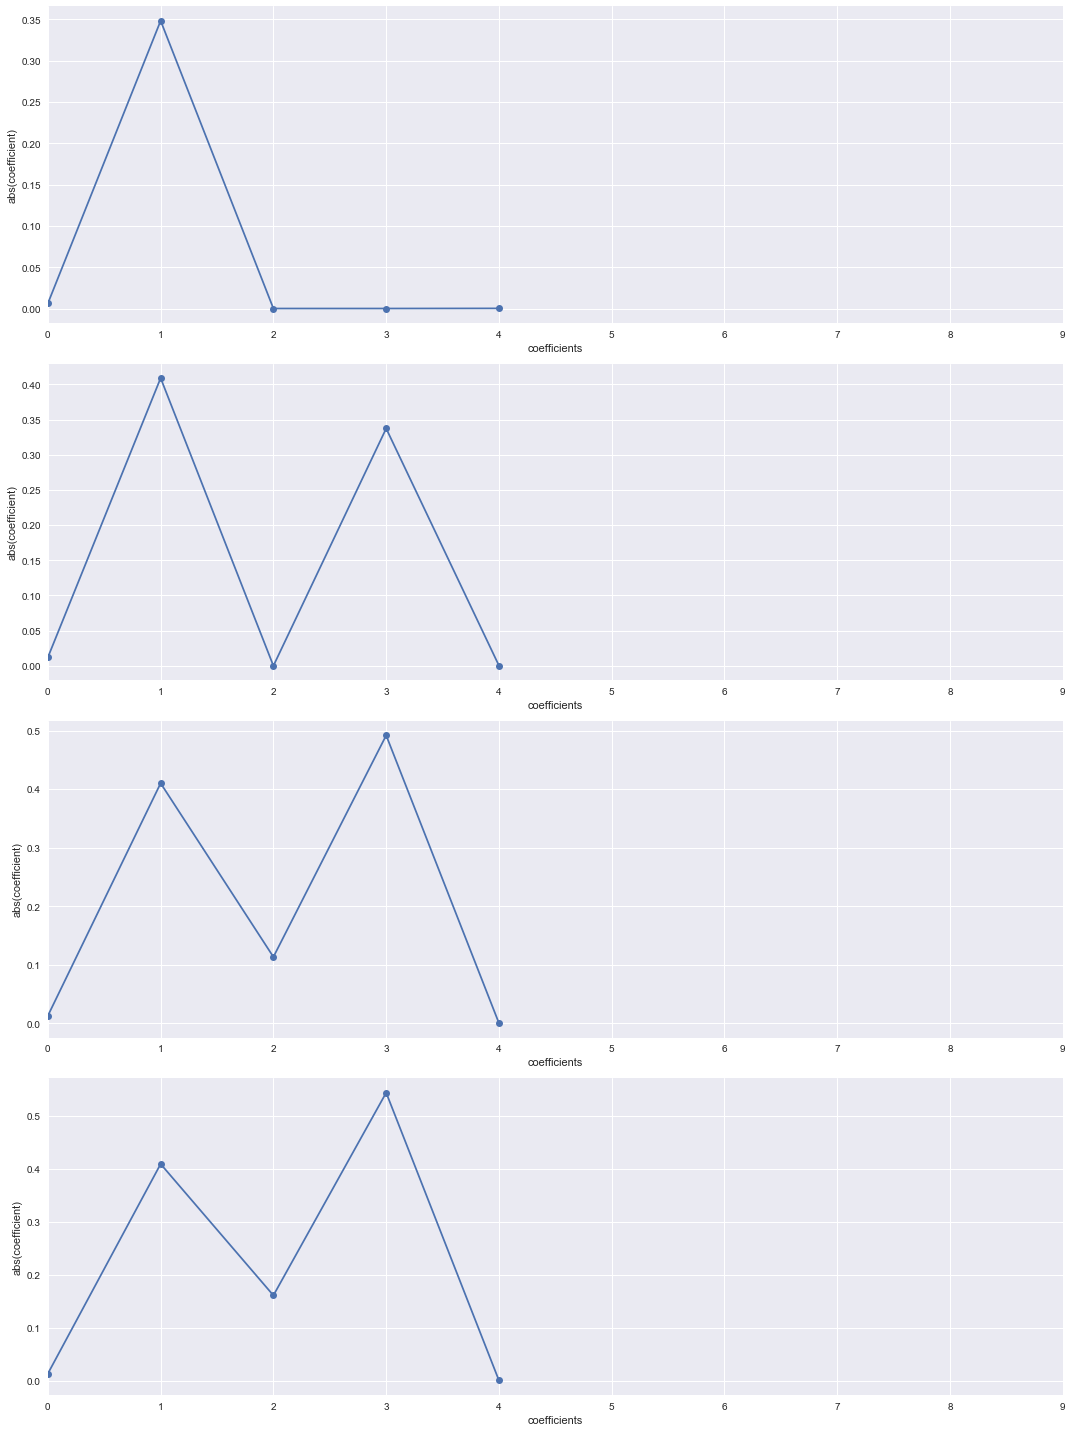

In [60]:
from sklearn.linear_model import Lasso

# Create only 2 plot rows, only trying 2 alphas
fig, ax_rows = plt.subplots(4, figsize=(15, 20))

# Plot the results next to the coefficient values for each of hte 2 alphas

alphas = [ 1e-2,1e-3,1e-4, 0] 
for alpha, ax_row in zip(alphas, ax_rows):
    lasso = Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train, y_train)
    print(lasso.alpha,lasso.coef_, lasso.intercept_)
    plot_coefficients(lasso,ax_row, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()


### Way2 for Lasso 

In [61]:
names = X.columns
names

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Widest_Release'],
      dtype='object')

In [62]:
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()

    # Create a column of feature names
    df['Feature Name'] = names

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        # Normalize features as the scales vary for each feature
        lasso = Lasso(alpha=alpha, normalize=True)

        # Fit the lasso regression
        lasso.fit(X_train, y_train)


        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        #Returns the coefficient of determination R^2 of the prediction.
        print(lasso.score(X_test,y_test))  
        

    # Return the datafram    
    return df

In [63]:
lasso([0.01,.001, .0001, 0])   # Lasso r2 scores below for the different alphas

0.401975058666
0.460457210247
0.489868589985
0.501022569327


/Users/sdutta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.010000,Alpha = 0.001000,Alpha = 0.000100,Alpha = 0.000000
0,Run_Time,0.006195,0.012023,0.012894,0.013079
1,log_Adj_Budget,0.348309,0.408951,0.410120,0.408624
2,log_FranNum_X_WidRel,0.000000,0.000000,0.113384,0.160660
3,log_FranchiseNum,-0.000000,-0.337319,-0.491879,-0.543123
4,Widest_Release,0.000161,0.000333,0.000296,0.000274


At diff values of Alpha we get the coeffs. of the linear eaquation
And to correct overfitting Lasso makes coeeff of features that are causing it 0 From the above table it seems important features are log_Adj_Budget and negatively relates logFraniseNum

In [64]:
L_DF = lasso([0.01,.001, .0001, 0])

0.401975058666
0.460457210247
0.489868589985
0.501022569327


/Users/sdutta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [65]:
Final_Lasso = L_DF.filter(['Feature Name','Alpha = 0.000000'])
Final_Lasso.sort_values(by='Alpha = 0.000000')

,Feature Name,Alpha = 0.000000
3,log_FranchiseNum,-0.543123
4,Widest_Release,0.000274
0,Run_Time,0.013079
2,log_FranNum_X_WidRel,0.160660
1,log_Adj_Budget,0.408624


### Way3 LassoCV  ---> Uses CV to select the best alpha & model
Lasso linear model with iterative fitting along a regularization path
The best model is selected by cross-validation.


# Use this Lasso CV r2 score as final


In [66]:
from sklearn.linear_model import LassoCV

In [67]:
X.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Widest_Release'],
      dtype='object')

In [68]:
# Another way to do Lasso with CV. This method chooses the best alpha to conduct CV
lcv = LassoCV(alphas=(0.01,.001, .0001, 0), cv=10,normalize=True )
lcv.fit(X,y)  # No need to split the data as LassoCV does the splitting on its own for CV
print(lcv.score(X,y))
print(lcv.alpha_)    # The alpha or amount of penalization choosen by CV 
print(lcv.coef_)
print(lcv.intercept_)

0.573470896322
0.0
[  1.25285684e-02   3.76259394e-01   7.29906655e-01  -1.06467390e+00
   3.35696575e-05]
5.67469485993


/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1211: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-p

### Lasso Regression with alpha = 0 and Features-> run_time, log_Adj_Budget, log_FranNum_X_WidRel and log_FranchiseNum

In [69]:
from sklearn.linear_model import LassoCV

In [70]:
X1 = New2.loc[:,['Run_Time','log_Adj_Budget','log_FranNum_X_WidRel','log_FranchiseNum'] ]
y1 = New2.loc[:,'log_Adj_World_Gross']

lcv = LassoCV(alphas=(0.01,.001, .0001, 0), cv=10,normalize=True )
lcv.fit(X1,y1)
print(lcv.score(X1,y1))
print(lcv.alpha_)    # The amount of penalization choosen by CV 
print(lcv.coef_)
print(lcv.intercept_)

0.573286974312
0.0
[ 0.01261157  0.37982808  0.76893829 -1.10008459]
5.39059535304


/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1211: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-p

**Analysis:** r^2  final cross validated value is 0.573286974312

In [71]:
from sklearn.externals import joblib
joblib.dump(lcv, '../data/lcvMain_sk_model.pkl')

['../data/lcvMain_sk_model.pkl']

#### Based on LassoCV only keeping Run_Time, log_Adj_Budget, log_FranNum_X_WidRel and log FranchiseNum

In [72]:
lm = smf.ols('log_Adj_World_Gross ~Run_Time+log_Adj_Budget +log_FranNum_X_WidRel+ log_FranchiseNum', data=New2)
fit_final = lm.fit()

fit_final.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_Adj_World_Gross   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.570
Method:                  Least Squares   F-statistic:                     197.5
Date:                 Tue, 10 Oct 2017   Prob (F-statistic):          3.08e-107
Time:                         12:04:30   Log-Likelihood:                -727.04
No. Observations:                  593   AIC:                             1464.
Df Residuals:                      588   BIC:                             1486.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.3906      0.517     10.426      0.000       4.375       6.406
Run_Time                 0.0126      0.002      6.586      0.000       0.009       0.016
log_Adj_Budget           0.3798      0.035     10.862      0.000       0.311       0.449
log_FranNum_X_WidRel     0.7689      0.064     11.960      0.000       0.643       0.895
log_FranchiseNum        -1.1001      0.091    -12.152      0.000      -1.278      -0.922
==============================================================================
Omnibus:                       71.769   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.757
Skew:                          -0.461   Prob(JB):                     8.10e-66
Kurtosis:                       6.359   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  The above OLS r2 score  and LassoCV r2  are almost same ---> no over or underfitting

In [73]:
fit_final.save('../data/OLS_Main_sk_model.pkl')

### Ridege Regularization and cross validation

In [74]:
X1.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum'],
      dtype='object')

In [75]:
rcv = RidgeCV(cv=10, normalize=True)

In [76]:
rcv.fit(X1, y1)        # As RidgeCV does CV on its own, no need to split the X1 & y1
rcv.score(X1, y1)

0.57112594628985636

In [77]:
rcv.coef_

array([ 0.0123949 ,  0.39733027,  0.67044021, -0.94683397])

#### Ridge CV r2 score is comparable to Lasso CV score of 0.573286974312

In [78]:
from sklearn.externals import joblib
joblib.dump(rcv, '../data/rcvMain_sk_model.pkl')


['../data/rcvMain_sk_model.pkl']

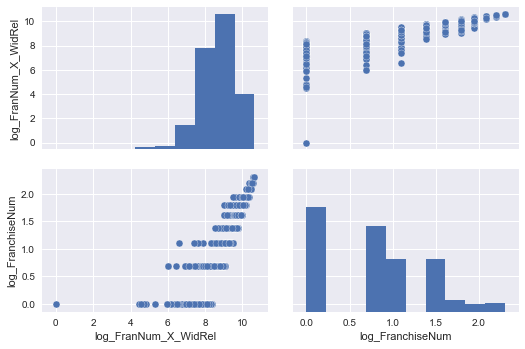

In [79]:
sns.pairplot(X[['log_FranNum_X_WidRel','log_FranchiseNum']], size = 2.5, aspect=1.5)

In [80]:
X.corr() 
# Correlation b/w log_FranNum_X_WidRel & Widest_Release is high but scores\
# of LassoCV and RidgeCV are the same so this model has just right fit

,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Widest_Release
Run_Time,1.000000,0.479946,0.199231,0.134611,0.260157
log_Adj_Budget,0.479946,1.000000,0.481091,0.224164,0.577702
log_FranNum_X_WidRel,0.199231,0.481091,1.000000,0.792769,0.715377
log_FranchiseNum,0.134611,0.224164,0.792769,1.000000,0.289896
Widest_Release,0.260157,0.577702,0.715377,0.289896,1.000000


## Adding a column for log y predicted by the LassoCV model
(named lcv in the lassoCV section above)

In [81]:
New2['Predict_logy'] = lcv.predict(X1)

In [82]:
New2.head()

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranchiseNum,log_FranNum_X_WidRel,Predict_logy
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,0.000000,8.095599,20.021586
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,0.693147,8.315322,18.879537
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,0.000000,7.677864,17.941802
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,0.693147,8.438150,18.012483
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,0.000000,7.785721,19.603342


In [83]:
New2.columns

Index(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget', 'log_FranchiseNum',
       'log_FranNum_X_WidRel', 'Predict_logy'],
      dtype='object')

In [84]:
New2.to_pickle('../Data/New2_DF.pkl')

In [85]:
ls! ../Data

ls: !: No such file or directory
../Data:
Analysis1_DF.pkl       GenreDF_y.pkl          lcvGenre_sk_model.pkl
FinalBudget.json       Genre_DF.pkl           lcvMain_sk_model.pkl
Finalnew_movies.json   Movies2DF.pkl          missbudget.json
GenreDF.pkl            New2_DF.pkl            project_data1.pkl
GenreDF_OLS_fit2.pkl   OLS_Main_sk_model.pkl  project_data2.pkl
GenreDF_X.pkl          flist.json             rcvMain_sk_model.pkl


In [88]:
Analysis1 = New2.filter(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget','log_FranNum_X_WidRel', 'log_FranchiseNum','Predict_logy'])

In [89]:
Analysis1.head()

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,8.095599,0.000000,20.021586
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147,18.879537
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,7.677864,0.000000,17.941802
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,8.438150,0.693147,18.012483
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,7.785721,0.000000,19.603342


In [91]:
Analysis1['PredictDiff']=Analysis1['log_Adj_World_Gross'] - Analysis1['Predict_logy']

In [92]:
Analysis1 = Analysis1[Analysis1.MovieTitle != 'King Kong']
Analysis1 = Analysis1[Analysis1.MovieTitle != 'Twilight']
Analysis1 = Analysis1[Analysis1.MovieTitle != 'Casino Royale']

In [93]:
Analysis1.head()

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,8.095599,0.000000,20.021586,0.168687
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147,18.879537,-1.845988
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,7.677864,0.000000,17.941802,0.079776
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,8.438150,0.693147,18.012483,-1.077584
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,7.785721,0.000000,19.603342,-1.023681


In [94]:
Analysis1.sort_values(by=['PredictDiff'])

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
25,15.119564,Atlas Shrugged: Part II,AtlasShruggedFranchise,Drama,2012-10-12,2,3.684200e+06,1.104359e+07,1012.0,112.0,16.217361,7.612831,0.693147,18.054176,-2.934612
252,9.024011,The Giant Mechanical Man,Mechanic,Romantic Comedy,2012-04-27,1,8.300000e+03,1.010005e+06,1.0,94.0,13.825466,0.000000,0.000000,11.827383,-2.803372
5,13.749026,Atlas Shrugged Part III: Who Is John Galt?,AtlasShruggedFranchise,Drama,2014-09-12,3,9.356777e+05,5.493065e+06,242.0,106.0,15.518997,6.587550,1.098612,16.478825,-2.729799
498,15.276168,Mallrats,ViewAskewniverse,Comedy,1995-10-20,2,4.308792e+06,1.246635e+07,852.0,97.0,16.338543,7.440734,0.693147,17.778699,-2.502531
166,16.428036,Hot Tub Time Machine 2,HotTubTimeMachine,Comedy,2015-02-20,2,1.363343e+07,1.532756e+07,2901.0,93.0,16.545163,8.665958,0.693147,18.748855,-2.320819
237,16.783607,Machete Kills,Machete,Action,2013-10-11,2,1.945484e+07,2.129353e+07,2538.0,107.0,16.873914,8.532279,0.693147,18.947494,-2.163888
70,16.746996,Universal Soldier: The Return,UniversalSoldier,Sci-Fi Action,1999-08-20,2,1.875547e+07,7.874995e+07,1639.0,83.0,18.181788,8.094989,0.693147,18.805335,-2.058339
139,16.622211,Godzilla 2000,Godzilla,Sci-Fi Horror,2000-08-18,3,1.655520e+07,2.144159e+07,2111.0,99.0,16.880843,8.753529,1.098612,18.573316,-1.951105
46,16.949630,Robocop 3,Robocop,Sci-Fi Action,1993-11-05,3,2.296840e+07,4.724148e+07,1796.0,105.0,17.670783,8.591930,1.098612,18.824766,-1.875137
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147,18.879537,-1.845988


In [95]:
Analysis1.describe()

,log_Adj_World_Gross,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
count,586.000000,586.000000,5.860000e+02,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,19.357561,2.679181,4.382164e+08,9.212944e+07,2936.174061,109.660410,17.810661,8.643453,0.772216,19.335353,0.022208
std,1.256623,1.854395,4.174808e+08,7.973195e+07,1004.048271,19.651903,1.305401,1.018542,0.647812,0.951282,0.781800
min,9.024011,1.000000,8.300000e+03,1.503121e+04,1.000000,63.000000,9.617884,0.000000,0.000000,11.827383,-2.934612
25%,18.614066,1.000000,1.213351e+08,3.024343e+07,2388.250000,94.000000,17.224789,8.064951,0.000000,18.853009,-0.400681
50%,19.554722,2.000000,3.108193e+08,6.691622e+07,3180.500000,106.000000,18.018951,8.797397,0.693147,19.445920,0.042675
75%,20.268680,3.000000,6.347114e+08,1.418138e+08,3702.500000,122.000000,18.770024,9.324381,1.098612,19.955589,0.459003
max,21.875781,10.000000,3.166146e+09,6.786261e+08,4468.000000,200.000000,20.335581,10.635134,2.302585,21.048073,3.286376


###  Movies Underpredicted by Model 

In [96]:
mask2 = (Analysis1['log_Adj_World_Gross'] >= 1.09 * Analysis1['Predict_logy'])

In [97]:
Analysis1[(mask2)].sort_values(by=['PredictDiff'], ascending = False)

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
212,21.446623,Jaws,Jaws,Horror Thriller,1975-06-20,3,2.061341e+09,3.065517e+07,675.0,125.0,17.238312,7.613325,1.098612,18.160247,3.286376
61,19.889764,The Blair Witch Project,BlairWitch,Horror,1999-07-16,1,4.345250e+08,1.050000e+05,2538.0,86.0,11.561716,7.839132,0.000000,16.894463,2.995301
284,19.239725,Paranormal Activity,ParanormalActivity,Horror,2009-09-25,1,2.268332e+08,1.752212e+04,2712.0,99.0,9.771219,7.905442,0.000000,16.429321,2.810405
112,18.234025,The Evil Dead,EvilDead,Horror Comedy,1983-01-01,1,8.297292e+07,1.058328e+06,128.0,85.0,13.872201,4.852030,0.000000,15.462542,2.771483
211,20.492144,Jaws 2,Jaws,Horror Thriller,1978-06-16,2,7.936429e+08,7.598291e+07,640.0,116.0,18.146019,7.154615,0.693147,18.484842,2.007302
179,20.955668,Raiders of the Lost Ark,IndianaJones,Period Adventure,1981-06-12,1,1.261626e+09,5.823997e+07,1078.0,115.0,17.880082,6.982863,0.000000,19.001673,1.953994
86,20.463442,Crocodile Dundee,CrocodileDundee,Adventure Comedy,1986-09-26,1,7.711875e+08,2.067757e+07,1495.0,93.0,16.844560,7.309881,0.000000,18.582356,1.881086
8,20.396463,Alien,Alien,Sci-Fi Horror,1979-05-25,1,7.212256e+08,3.896016e+07,757.0,117.0,17.478050,6.629363,0.000000,18.602374,1.794089
109,15.293624,El Mariachi,ElMariachi,Action,1993-02-26,1,4.384664e+06,1.503121e+04,88.0,81.0,9.617884,4.477337,0.000000,13.508070,1.785553
260,19.417179,The Girl with the Dragon Tattoo,Millennium,Thriller,2010-03-19,1,2.708781e+08,1.471094e+07,202.0,152.0,16.504102,5.308268,0.000000,17.658005,1.759175


### Movies Overpredicted  by Model

In [99]:
mask = (Analysis1['log_Adj_World_Gross'] <= .90 * Analysis1['Predict_logy'])

In [100]:
Analysis1[(mask)].sort_values(by=['PredictDiff'])

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
25,15.119564,Atlas Shrugged: Part II,AtlasShruggedFranchise,Drama,2012-10-12,2,3.684200e+06,1.104359e+07,1012.0,112.0,16.217361,7.612831,0.693147,18.054176,-2.934612
252,9.024011,The Giant Mechanical Man,Mechanic,Romantic Comedy,2012-04-27,1,8.300000e+03,1.010005e+06,1.0,94.0,13.825466,0.000000,0.000000,11.827383,-2.803372
5,13.749026,Atlas Shrugged Part III: Who Is John Galt?,AtlasShruggedFranchise,Drama,2014-09-12,3,9.356777e+05,5.493065e+06,242.0,106.0,15.518997,6.587550,1.098612,16.478825,-2.729799
498,15.276168,Mallrats,ViewAskewniverse,Comedy,1995-10-20,2,4.308792e+06,1.246635e+07,852.0,97.0,16.338543,7.440734,0.693147,17.778699,-2.502531
166,16.428036,Hot Tub Time Machine 2,HotTubTimeMachine,Comedy,2015-02-20,2,1.363343e+07,1.532756e+07,2901.0,93.0,16.545163,8.665958,0.693147,18.748855,-2.320819
237,16.783607,Machete Kills,Machete,Action,2013-10-11,2,1.945484e+07,2.129353e+07,2538.0,107.0,16.873914,8.532279,0.693147,18.947494,-2.163888
70,16.746996,Universal Soldier: The Return,UniversalSoldier,Sci-Fi Action,1999-08-20,2,1.875547e+07,7.874995e+07,1639.0,83.0,18.181788,8.094989,0.693147,18.805335,-2.058339
139,16.622211,Godzilla 2000,Godzilla,Sci-Fi Horror,2000-08-18,3,1.655520e+07,2.144159e+07,2111.0,99.0,16.880843,8.753529,1.098612,18.573316,-1.951105
64,14.846914,The Work and the Glory II: American Zion,TheWorkandtheGlory,Period Drama,2005-10-21,2,2.805000e+06,9.003561e+06,206.0,100.0,16.013131,6.021023,0.693147,16.601263,-1.754349


In [101]:
Analysis1.describe()

,log_Adj_World_Gross,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict_logy,PredictDiff
count,586.000000,586.000000,5.860000e+02,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,19.357561,2.679181,4.382164e+08,9.212944e+07,2936.174061,109.660410,17.810661,8.643453,0.772216,19.335353,0.022208
std,1.256623,1.854395,4.174808e+08,7.973195e+07,1004.048271,19.651903,1.305401,1.018542,0.647812,0.951282,0.781800
min,9.024011,1.000000,8.300000e+03,1.503121e+04,1.000000,63.000000,9.617884,0.000000,0.000000,11.827383,-2.934612
25%,18.614066,1.000000,1.213351e+08,3.024343e+07,2388.250000,94.000000,17.224789,8.064951,0.000000,18.853009,-0.400681
50%,19.554722,2.000000,3.108193e+08,6.691622e+07,3180.500000,106.000000,18.018951,8.797397,0.693147,19.445920,0.042675
75%,20.268680,3.000000,6.347114e+08,1.418138e+08,3702.500000,122.000000,18.770024,9.324381,1.098612,19.955589,0.459003
max,21.875781,10.000000,3.166146e+09,6.786261e+08,4468.000000,200.000000,20.335581,10.635134,2.302585,21.048073,3.286376


In [102]:
Analysis1.Adj_Budget.quantile(.1)

11152924.942663081

### Plotting Prediction Vs Actual  (for Predicted log y)  
Predicted logy here is the Analysis1['Predict'] column

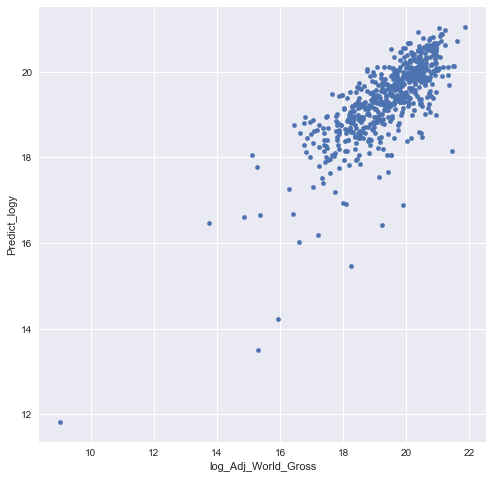

In [103]:
from IPython.display import Image
import matplotlib.pyplot as plt

Analysis1.plot(x='log_Adj_World_Gross',y="Predict_logy",kind='scatter'\
               ,figsize=(8,8))

In [104]:
Analysis1.to_pickle('../Data/Analysis1_DF.pkl')

### Calculating Predicted y from Predicted log y                                            
(Predict log y is column 'Predict' in Analysis1 DataFrame)

In [105]:
Analysis1['Predict_y'] = np.exp(Analysis1['Predict_logy'])

### Calculating R^2 for y

In [107]:
SSE = ((Analysis1['Predict_y']-Analysis1['Adj_World_Gross'])**2).sum()
SSE

5.8403936346266345e+19

In [108]:
yActualMean = Analysis1['Adj_World_Gross'].mean()
yActualMean

438216447.49009776

In [117]:
SST = ((yActualMean-Analysis1['Adj_World_Gross'])**2).sum()
SST

1.0195976135594942e+20

In [118]:
r2 = 1 - SSE/SST
r2

0.4271864158020763

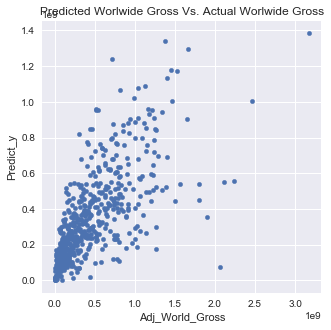

In [158]:
Analysis1.plot(x='Adj_World_Gross',y="Predict_y",kind='scatter'\
               ,figsize=(5,5), title=\
               'Predicted Worlwide Gross Vs. Actual Worlwide Gross')

In [128]:
Analysis1.head()

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Predict,PredictDiff,Predict_y
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,8.095599,0.000000,20.021586,0.168687,4.957517e+08
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147,18.879537,-1.845988,1.582263e+08
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,7.677864,0.000000,17.941802,0.079776,6.194774e+07
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,8.438150,0.693147,18.012483,-1.077584,6.648475e+07
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,7.785721,0.000000,19.603342,-1.023681,3.263046e+08


### Genre Analysis

In [129]:
New2.columns


Index(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget', 'log_FranchiseNum',
       'log_FranNum_X_WidRel', 'Predict'],
      dtype='object')

In [130]:
Genre_df = Analysis1.filter(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget','log_FranNum_X_WidRel', 'log_FranchiseNum'])





In [131]:
Genre_df

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,8.095599,0.000000
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,7.677864,0.000000
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,8.438150,0.693147
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,7.785721,0.000000
5,18.922488,Along Came a Spider,AlexCross,Thriller,2001-04-06,2,1.651704e+08,9.424031e+07,2573.0,103.0,18.361359,8.545975,0.693147
6,17.482264,Alex Cross,AlexCross,Crime Thriller,2012-10-19,3,3.912468e+07,3.865338e+07,2541.0,101.0,17.470145,8.938925,1.098612
7,19.459876,Alice Through the Looking Glass,AliceinWonderland,Family Adventure,2016-05-27,2,2.826941e+08,1.732179e+08,3763.0,112.0,18.970061,8.926119,0.693147
8,20.396463,Alien,Alien,Sci-Fi Horror,1979-05-25,1,7.212256e+08,3.896016e+07,757.0,117.0,17.478050,6.629363,0.000000
9,19.900619,Aliens,Alien,Sci-Fi Horror,1986-07-18,2,4.392677e+08,4.073584e+07,1454.0,137.0,17.522619,7.975221,0.693147


In [132]:
list(Genre_df['genre'].unique())

['Period Action',
 'Family Adventure',
 'Comedy',
 'Horror Comedy',
 'Thriller',
 'Crime Thriller',
 'Sci-Fi Horror',
 'Sci-Fi Action',
 'Family Comedy',
 'Horror',
 'Documentary',
 'Animation',
 'Romantic Comedy',
 'Drama',
 'Sci-Fi Adventure',
 'Action / Adventure',
 'Western',
 'Action Comedy',
 'Action Thriller',
 'Romance',
 'Comedy / Drama',
 'Action Horror',
 'Action',
 'Action Fantasy',
 'Adventure Comedy',
 'Fantasy',
 'Family',
 'Period Adventure',
 'Crime Drama',
 'Horror Thriller',
 'Sports Comedy',
 'Sci-Fi Thriller',
 'Sci-Fi Comedy',
 'Crime Comedy',
 'Sci-Fi Fantasy',
 'Sports Drama',
 'Action Drama',
 'Crime',
 'Adventure',
 'Music Drama',
 'Period Horror',
 'Action / Crime',
 'Sports Action',
 'Period Drama',
 'Fantasy Comedy',
 'Unknown']

In [133]:
Genre_df.genre.value_counts()

Horror                74
Comedy                70
Action / Adventure    59
Animation             54
Action                51
Sci-Fi Action         23
Action Comedy         21
Fantasy               20
Sci-Fi Adventure      19
Thriller              16
Family Comedy         16
Horror Comedy         16
Family Adventure      16
Action Horror         15
Sci-Fi Horror         13
Period Adventure      12
Action Thriller       12
Romance                8
Romantic Comedy        7
Drama                  6
Action Fantasy         6
Sci-Fi Fantasy         6
Crime Drama            4
Music Drama            4
Crime Comedy           3
Action Drama           3
Horror Thriller        3
Sports Comedy          3
Sci-Fi Comedy          2
Family                 2
Period Action          2
Adventure              2
Sports Action          2
Comedy / Drama         2
Period Drama           2
Adventure Comedy       2
Crime Thriller         1
Sci-Fi Thriller        1
Period Horror          1
Crime                  1


### Making new Genres column with wider groups

In [134]:
Genre_df['GenreGrp']=Genre_df['genre']

In [135]:
Genre_df.loc[Genre_df.genre.isin(['Period Action','Thriller','Action / Adventure', \
             'Crime Thriller','Family Adventure', 'Western','Action Thriller',\
             'Action’,’Action Fantasy', 'Period Adventure', 'Action Drama', 'Crime',\
             'Adventure', 'Action / Crime', 'Sports Action','Action Fantasy']),'GenreGrp'] = 'Action'                             
                                
                                

In [136]:
Genre_df.loc[Genre_df.genre.isin(['Comedy',  'Family Comedy', 'Horror Comedy', \
            'Romantic Comedy','Action Comedy','Comedy / Drama', 'Adventure Comedy', \
            'Sports Comedy', 'Crime Comedy', 'Fantasy Comedy']),'GenreGrp'] = 'Comedy'     


In [137]:
Genre_df.loc[Genre_df.genre.isin(['Horror','Sci-Fi Horror', 'Action Horror',\
            'Horror Thriller', 'Period Horror','Unknown']),'GenreGrp'] = 'Horror'     


In [138]:
Genre_df.loc[Genre_df.genre.isin(['Animation']),'GenreGrp'] = 'Animation' 

In [139]:
Genre_df.loc[Genre_df.genre.isin(['Documentary']),'GenreGrp'] = 'Documentary'

In [140]:
Genre_df.loc[Genre_df.genre.isin(['Drama','Romance', 'Fantasy', 'Family', 'Crime Drama',\
            'Sports Drama', 'Music Drama', 'Period Drama']),'GenreGrp'] = 'Drama' 

In [141]:
Genre_df.loc[Genre_df.genre.isin(['Sci-Fi Action','Sci-Fi Adventure', 'Sci-Fi Thriller',\
            'Sci-Fi Comedy', 'Sci-Fi Fantasy']),'GenreGrp'] = 'Sci-Fi' 

In [142]:
Genre_df

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,GenreGrp
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,18.246206,8.095599,0.000000,Action
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,17.565857,8.315322,0.693147,Action
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,14.844816,7.677864,0.000000,Comedy
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,15.266869,8.438150,0.693147,Comedy
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,17.772394,7.785721,0.000000,Action
5,18.922488,Along Came a Spider,AlexCross,Thriller,2001-04-06,2,1.651704e+08,9.424031e+07,2573.0,103.0,18.361359,8.545975,0.693147,Action
6,17.482264,Alex Cross,AlexCross,Crime Thriller,2012-10-19,3,3.912468e+07,3.865338e+07,2541.0,101.0,17.470145,8.938925,1.098612,Action
7,19.459876,Alice Through the Looking Glass,AliceinWonderland,Family Adventure,2016-05-27,2,2.826941e+08,1.732179e+08,3763.0,112.0,18.970061,8.926119,0.693147,Action
8,20.396463,Alien,Alien,Sci-Fi Horror,1979-05-25,1,7.212256e+08,3.896016e+07,757.0,117.0,17.478050,6.629363,0.000000,Horror
9,19.900619,Aliens,Alien,Sci-Fi Horror,1986-07-18,2,4.392677e+08,4.073584e+07,1454.0,137.0,17.522619,7.975221,0.693147,Horror


#### Creating Dummy Variables for Genre

In [143]:
Genre_df['Action'] = np.where(Genre_df['GenreGrp'] == 'Action', 1.0, 0.0)

In [144]:
Genre_df['Comedy' ] = np.where(Genre_df['GenreGrp'] == 'Comedy' , 1.0, 0.0)

In [145]:
Genre_df['Horror'] = np.where(Genre_df['GenreGrp'] == 'Horror', 1.0, 0.0)

In [146]:
Genre_df['Animation'] = np.where(Genre_df['GenreGrp'] ==  'Animation', 1.0, 0.0)

In [147]:
Genre_df['Documentary'] = np.where(Genre_df['GenreGrp'] == 'Documentary', 1.0, 0.0)

In [148]:
Genre_df['Drama' ] = np.where(Genre_df['GenreGrp'] == 'Drama' , 1.0, 0.0)

In [149]:
Genre_df['Sci-Fi'] = np.where(Genre_df['GenreGrp'] == 'Sci-Fi', 1.0, 0.0)

In [150]:
Genre_df

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,...,log_FranNum_X_WidRel,log_FranchiseNum,GenreGrp,Action,Comedy,Horror,Animation,Documentary,Drama,Sci-Fi
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,...,8.095599,0.000000,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,...,8.315322,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,...,7.677864,0.000000,Comedy,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,...,8.438150,0.693147,Comedy,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,...,7.785721,0.000000,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,18.922488,Along Came a Spider,AlexCross,Thriller,2001-04-06,2,1.651704e+08,9.424031e+07,2573.0,103.0,...,8.545975,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17.482264,Alex Cross,AlexCross,Crime Thriller,2012-10-19,3,3.912468e+07,3.865338e+07,2541.0,101.0,...,8.938925,1.098612,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19.459876,Alice Through the Looking Glass,AliceinWonderland,Family Adventure,2016-05-27,2,2.826941e+08,1.732179e+08,3763.0,112.0,...,8.926119,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20.396463,Alien,Alien,Sci-Fi Horror,1979-05-25,1,7.212256e+08,3.896016e+07,757.0,117.0,...,6.629363,0.000000,Horror,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,19.900619,Aliens,Alien,Sci-Fi Horror,1986-07-18,2,4.392677e+08,4.073584e+07,1454.0,137.0,...,7.975221,0.693147,Horror,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Regression on Genre  Features in Genre Analysis file

In [151]:
Genre_df.to_pickle('../Data/GenreDF.pkl')

## Useful Info

In [ ]:
### Needed for this applies to statsmodels.api, but does not 
##apply to statsmodels.formulas.api or sklearn)
'''
Vinny mentioned today that if you don’t add an intercept, the r2 value from 
statsmodels isn’t valid. You might have noticed this if you get unusually high r2 values.
If you run into this problem, I’ve demonstrated an easy way to add an intercept above.
'''

X["intercept"] = 1 # easily add an intercept
lm = sm.OLS(y,x)
fit = lm.fit()
fit.summary()

In [ ]:
# STUDENT SECTION
# Create a list of columns to keep. Copy the subset of data to a data frame called "cars"
cars = df[['wheel-base', 'length', 'width', 'height', 
           'curb-weight', 'engine-size', 'compression-ratio', 
           'city-mpg','highway-mpg', 'symboling', 'price', 'horsepower', 'peak-rpm']]


In [ ]:
cars['log_price'] = np.log(cars['price'])

In [ ]:
cars2.to_pickle('cars2frame.pkl')

In [ ]:
cars.corr().price.sort_values()



R2 should be .834, not bad. 
That means we believe we can explain about 83.4% of the variance in price with this mode